In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

file1 = 'dataset/master_table_binary.csv'
file2 = 'dataset/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv'

print(f"Loading {file1}...")
df1 = pd.read_csv(file1, low_memory=False)

print(f"Loading {file2}...")
df2 = pd.read_csv(file2, low_memory=False)

print(f"Rows in master_table: {len(df1)}")
print(f"Rows in large CSV: {len(df2)}")

# Check for intersection
common_cols = ['ImageID', 'StudyID', 'PatientID']
print(f"Merging on {common_cols}...")

intersection = pd.merge(df1, df2, on=common_cols, how='inner')

print(f"\nMatching rows: {len(intersection)}")

if len(intersection) > 0:
    print("\nFirst 5 matching rows:")
    print(intersection[common_cols].head())
    
    output_file = 'dataset/padchest_merged.csv'
    intersection.to_csv(output_file, index=False)
    print(f"\nFull intersection saved to {output_file}")
else:
    print("No matching rows found with identical ImageID, StudyID, and PatientID.")

Loading dataset/master_table_binary.csv...
Loading dataset/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv...
Rows in master_table: 4555
Rows in large CSV: 160861
Merging on ['ImageID', 'StudyID', 'PatientID']...

Matching rows: 4555

First 5 matching rows:
                                             ImageID  \
0  100171984015994193562581691034118023629_370g35...   
1  100274024312057428071392122021061686521_ydw2jy...   
2  100303250289824462365601716073337204998_42hmtt...   
3  100314450852379498616738398237033471531_fft9bx...   
4  100408592893325712743566568515083880150_5w8l92...   

                                   StudyID  \
0  100171984015994193562581691034118023629   
1  100274024312057428071392122021061686521   
2  100303250289824462365601716073337204998   
3  100314450852379498616738398237033471531   
4  100408592893325712743566568515083880150   

                                 PatientID  
0   36950993462043930453601886799511027334  
1  271186411129182858914593521410


Analyzing distribution for column: Projection
Projection
PA               4257
AP_horizontal     242
AP                 56
Name: count, dtype: int64


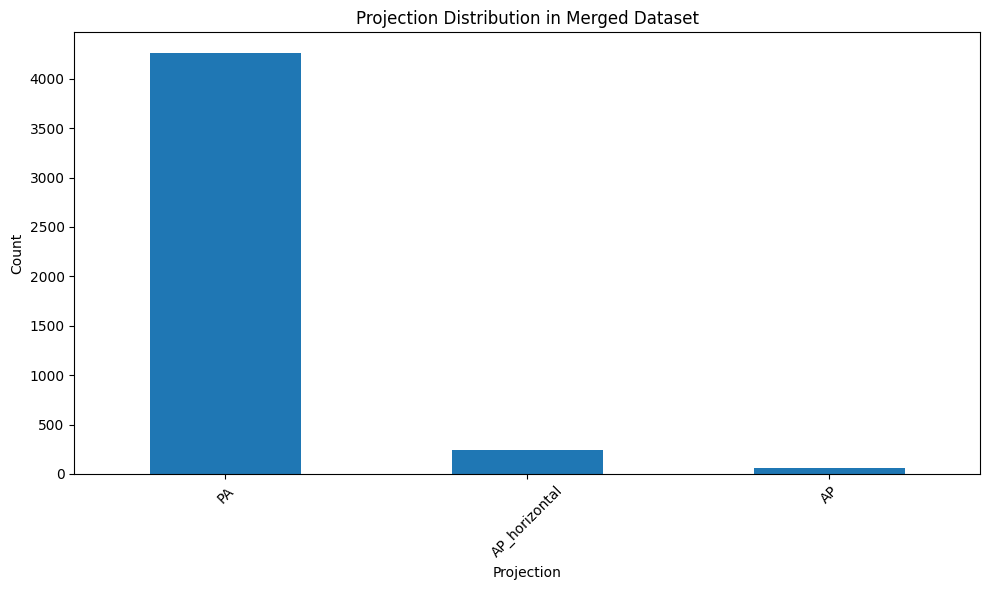


Total standard views (AP/PA variants): 4555 / 4555


In [6]:
# Analysing View Position Distribution
if os.path.exists('dataset/padchest_merged.csv'):
    if 'intersection' not in locals():
        print("Reading merged file...")
        intersection = pd.read_csv('dataset/padchest_merged.csv', low_memory=False)
    
    # Try to find relevant column
    target_cols = ['Projection', 'ViewPosition_DICOM', 'ViewPosition']
    found_col = None
    for col in target_cols:
        if col in intersection.columns:
            found_col = col
            break
            
    if found_col:
        print(f"\nAnalyzing distribution for column: {found_col}")
        dist = intersection[found_col].value_counts(dropna=False)
        print(dist)
        
        plt.figure(figsize=(10, 6))
        dist.plot(kind='bar')
        plt.title(f'{found_col} Distribution in Merged Dataset')
        plt.xlabel(found_col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Check specific AP/PA counts if applicable
        ap_pa_count = intersection[found_col].isin(['AP', 'PA', 'AP_horizontal', 'PA_horizontal']).sum()
        print(f"\nTotal standard views (AP/PA variants): {ap_pa_count} / {len(intersection)}")
    else:
        print("No Projection or ViewPosition column found in the dataset.")
        print("Available columns:", intersection.columns.tolist())

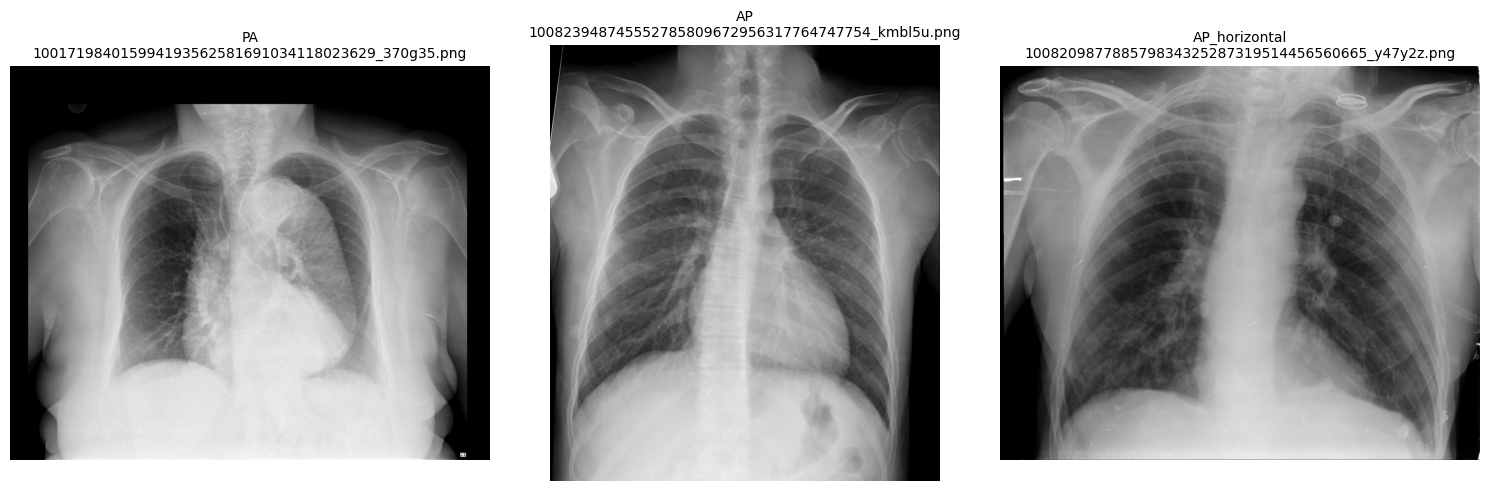

In [7]:
# Visualization of different projections
import matplotlib.image as mpimg

projections = ['PA', 'AP', 'AP_horizontal']
image_dir = 'dataset/Padchest_GR_files/PadChest_GR'

if 'intersection' in locals() and found_col:
    plt.figure(figsize=(15, 5))
    
    for i, proj in enumerate(projections):
        # Get a sample row for this projection
        sample = intersection[intersection[found_col] == proj]
        
        if len(sample) > 0:
            row = sample.iloc[0]
            image_id = row['ImageID']
            # ImageID in csv might need .png extension if not present, but file list showed .png
            # Let's check if ImageID has extension
            img_name = image_id if image_id.endswith('.png') else image_id + '.png'
            img_path = os.path.join(image_dir, img_name)
            
            plt.subplot(1, 3, i+1)
            try:
                img = mpimg.imread(img_path)
                plt.imshow(img, cmap='gray')
                plt.title(f"{proj}\n{img_name}", fontsize=10)
                plt.axis('off')
            except FileNotFoundError:
                plt.text(0.5, 0.5, 'Image not found', ha='center', va='center')
                plt.title(f"{proj} (Missing)", fontsize=10)
                plt.axis('off')
        else:
            plt.subplot(1, 3, i+1)
            plt.text(0.5, 0.5, 'No samples', ha='center', va='center')
            plt.title(f"{proj} (None)", fontsize=10)
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()
else:
    print("Dataframe 'intersection' not found or 'Projection' column missing. Run previous cells.")